## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
id_timepoint_df=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
id_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df.duplicated(["Mouse ID"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep="first", inplace=False)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_tumor_group = clean_df.groupby(["Drug Regimen"])
tumor_mean = regimen_tumor_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_tumor_group["Tumor Volume (mm3)"].median()
tumor_var = regimen_tumor_group["Tumor Volume (mm3)"].var()
tumor_std = regimen_tumor_group["Tumor Volume (mm3)"].std()
tumor_sem = regimen_tumor_group["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame ({"Mean": tumor_mean,
                               "Median":tumor_median,
                               "Variance":tumor_var,
                               "Standard Deviation":tumor_std,
                               "SEM": tumor_sem})
tumor_summary = tumor_summary.sort_values(["SEM"])
tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


## Bar Plots

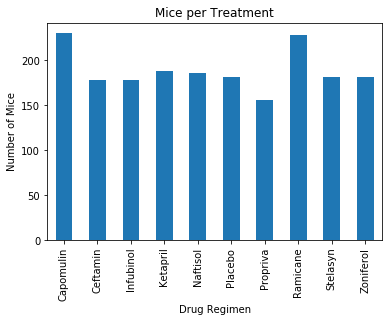

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_and_drug = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()

# mice_and_drug

mice_and_drug.plot(kind = "bar")

plt.title("Mice per Treatment")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()


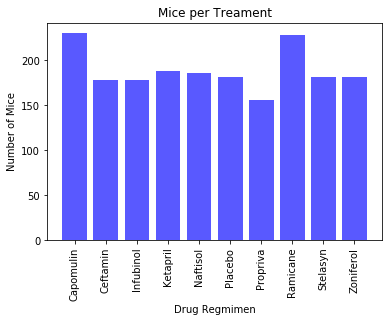

In [10]:
drug_regimen = clean_df["Drug Regimen"].unique()
drug_regimen
x_axis = np.arange(len(drug_regimen))
# x_axis = np.arange(len(mice_and_drug))

mice = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

plt.bar(x_axis, mice, color='blue', alpha=0.65, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                           "Ramicane", "Stelasyn", "Zoniferol"], rotation = "vertical")
plt.xlabel("Drug Regmimen")
plt.ylabel("Number of Mice")
plt.title("Mice per Treament")
plt.show()

## Pie Plots

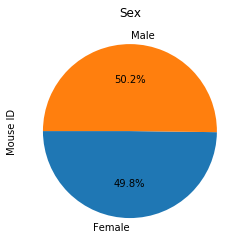

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# counts = clean_df.groupby(["Sex", "Mouse ID"]).count()
counts = clean_df.groupby("Sex")["Mouse ID"].nunique()
counts
counts.plot(kind = "pie", autopct = "%1.1f%%", startangle =180)
plt.title("Sex")

plt.show()

([<matplotlib.patches.Wedge at 0x1a1b286290>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

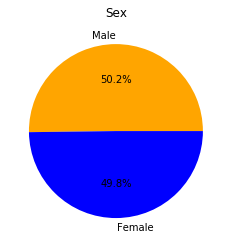

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_df.groupby("Sex")["Mouse ID"].nunique()
counts

labels = ["Male","Female"]
sizes = [125, 124]
colors = ["orange", "blue"]
plt.title("Sex")
plt.pie(sizes, labels= labels, colors = colors, autopct = "%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# mice_tumor = clean_df.set_index("Mouse ID")
# mice_tumor_summary = mice_tumor["Tumor Volume (mm3)"]
# mice_tumor_summary

# mice_tumor = clean_df.groupby(["Mouse ID", "Drug Regimen"])
# mice_tumor_sum = mice_tumor["Tumor Volume (mm3)", "Mouse ID"].sum()
# mice_tumor_sum
#Sorting by Tumor Volume to get top Four Regimen
# top_regimen = mice_tumor_sum.sort_values("Tumor Volume (mm3)",ascending = False)
# top_regimen

cap_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
cap_tumor = cap_df["Tumor Volume (mm3)"]
cap_tumor
# Capomulin Quartiles
quartiles = cap_tumor.quantile([.25,.5,.75])
cap_lowerq = quartiles[.25]
cap_upperq = quartiles[.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

# print(f"The Capomulin lower quartile of Tumor Volume is: {cap_lowerq}")
# print(f"The Capomulin upper quartile of Tumor Volume is: {cap_upperq}")
# print(f"The Capomulin interquartile range of Tumor Volume is: {cap_iqr}")
# print(f"The median of Capomulin is: {quartiles[0.5]} ")
print(f"Capomulin values below {cap_lower_bound} could be outliers.")
print(f"Caponulin values above {cap_upper_bound} could be outliers.")
print(f"-------------------------------------------------------------")

#Ramicane Quartiles

ram_df = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane"]
ram_tumor = ram_df["Tumor Volume (mm3)"]

ram_quartiles = ram_tumor.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

# print(f"The Ramicane lower quartile of Tumor Volume is: {ram_lowerq}")
# print(f"The Ramicane upper quartile of Tumor Volume is: {ram_upperq}")
# print(f"The Ramicane interquartile range of Tumor Volume is: {ram_iqr}")
# print(f"The median of Ramicane is: {ram_quartiles[0.5]} ")
print(f"Ramicane values below {ram_lower_bound} could be outliers.")
print(f"Ramicane values above {ram_upper_bound} could be outliers.")
print(f"--------------------------------------------------------------")

# Infubinol Quartiles
inf_df = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol"]
inf_tumor = inf_df["Tumor Volume (mm3)"]

inf_quartiles = inf_tumor.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[.25]
inf_upperq = inf_quartiles[.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

# print(f"The Infubinol lower quartile of Tumor Volume is: {inf_lowerq}")
# print(f"The Infubinol upper quartile of Tumor Volume is: {inf_upperq}")
# print(f"The Infubinol interquartile range of Tumor Volume is: {inf_iqr}")
# print(f"The median of Infubinol is: {inf_quartiles[0.5]} ")
print(f"Infubinol values below {inf_lower_bound} could be outliers.")
print(f"Infubinol values above {inf_upper_bound} could be outliers.")
print(f"--------------------------------------------------------------")

# Ceftamin
cef_df = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin"]
cef_tumor = cef_df["Tumor Volume (mm3)"]

cef_quartiles = cef_tumor.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[.25]
cef_upperq = cef_quartiles[.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

# print(f"The Ceftamin lower quartile of temperatures is: {cef_lowerq}")
# print(f"The Ceftamin upper quartile of temperatures is: {cef_upperq}")
# print(f"The Ceftamin interquartile range of temperatures is: {cef_iqr}")
# print(f"The Ceftamin the median of temperatures is: {cef_quartiles[0.5]} ")
print(f"Ceftamin values below {cef_lower_bound} could be outliers.")
print(f"Ceftamin values above {cef_upper_bound} could be outliers.")
# tumor_summary

Capomulin values below 26.714832162499995 could be outliers.
Caponulin values above 55.9711007025 could be outliers.
-------------------------------------------------------------
Ramicane values below 24.18658646249998 could be outliers.
Ramicane values above 57.48804812250001 could be outliers.
--------------------------------------------------------------
Infubinol values below 32.309217298749985 could be outliers.
Infubinol values above 72.31757996875001 could be outliers.
--------------------------------------------------------------
Ceftamin values below 32.818911426250004 could be outliers.
Ceftamin values above 71.19095325625 could be outliers.


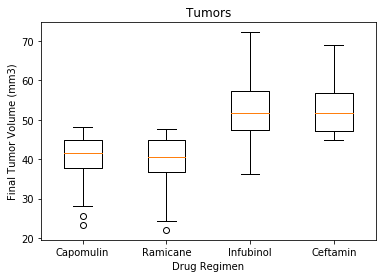

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(box_plot, labels=["Capomulin","Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

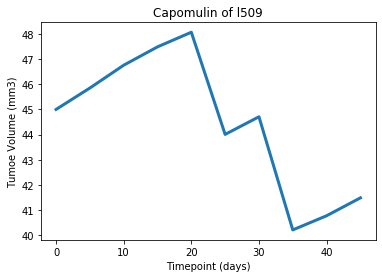

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# cap_tumor_id = cap_df[["Timepoint", "Tumor Volume (mm3)", "Mouse ID"]]
# cap_tumor_id
one_mouse = cap_df.loc[cap_df["Mouse ID"] == "l509"]
one_mouse

x_axis = one_mouse["Timepoint"]
y_axis = one_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis,linewidth=3)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumoe Volume (mm3)")
plt.title("Capomulin of l509")
plt.show()



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
